In [1]:
from utility_functions import *
from Multi_Layered_Perceptron import *
%matplotlib inline

## MNIST Dataset

- The MNIST database of handwritten digits, it has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

- It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

- The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

- [Source](http://yann.lecun.com/exdb/mnist/)

- Sample Image from the dataset

Preprocessing the MNIST Data...


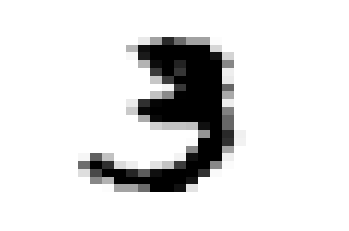

In [2]:
import seaborn as sns
# Benchmarking the perfromance of our MLP on MNIST dataset.
print('Preprocessing the MNIST Data...')
df_train, X_train, Y_train = preprocess_data_mnist('mnist_train.csv')
df_test, X_test, Y_test = preprocess_data_mnist('mnist_test.csv')
sns.heatmap(X_train.values[10].reshape(28,28), cbar=False, cmap='Greys', xticklabels=False, yticklabels=False)

In [3]:
print('Normalizing the MNIST Data...')
X_train, train_means, train_stds = normalize_train_data(X_train)
X_test = normalize_test_data(X_test, train_means, train_stds)
print('Done!')

Normalizing the MNIST Data...
Done!


### Network Architecture

<img src="https://i.imgur.com/R1O3e8U.png">

In [5]:
# create a Multilayer Perceptron with default parameters
print('Creating the architecture for Neural Network...')
inputs = 784; layers = [32, 16]; output = 10
mlp = Multi_Layered_Perceptron(n_inputs=inputs, hidden_layers=layers, n_outputs=output, activation_function='sigmoid')
print('Done!')

Creating the architecture for Neural Network...
Done!


In [4]:
# Randomly sampling 10k indices from 60k datapoints to train the model
import random
sample = random.sample(range(60000), 10000)

Training the Neural Network...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:44<00:00,  5.84s/it]


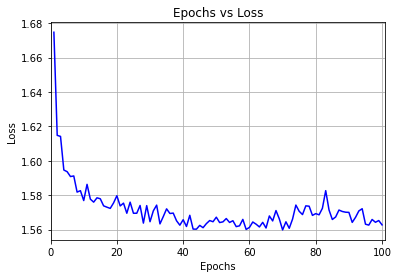

In [6]:
# training the network
print('Training the Neural Network...')
mlp.GradientDescent(X_train.values[sample], Y_train.values[sample], learning_rate=0.01, epochs=100,  beta1=0.9, beta2=0.999)
mlp.plot_loss()

In [7]:
# Evaluate Performance
print("Performance Evaluation")
y_pred_train_classes = mlp.predict(X_train.values[sample])
y_pred_test_classes = mlp.predict(X_test.values)
print('Training accuracy \t:',  round(accuracy(Y_train.values, y_pred_train_classes), 4))
print('Testing accuracy \t:', round(accuracy(Y_test.values, y_pred_test_classes), 4))

Performance Evaluation
Training accuracy 	: 0.85
Testing accuracy 	: 0.8721
